# Overview
In this project, we will analyze supply chain data to optimize shipping operations and enhance the customer delivery experience. Our analysis will focus on shipping performance and timeliness, customer delivery behavior across regions, and the relationship between sales performance and shipping efficiency.

We will try to answer questions like:
- Which region and market have the highest number of late product deliveries?  
- Which region and store generate the highest profit?  
- Are late orders related to specific departments?  
- Which region has the highest number of orders?  
- Which day of the week has the highest number of orders?  
- Which hour of the day has the highest number of orders?  
- What are the order trends over time?  
- Is there a relationship between discounts and low profit?  
- Which customer segments generate the highest profit?

# Data Gathering
You can download the dataset from this link: [DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS
](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data)

#### Dataset Fields and Descriptions

| **Field**                         | **Description**                                                                                   |
|----------------------------------|---------------------------------------------------------------------------------------------------|
| `Type`                           | Type of transaction made                                                                          |
| `Days for shipping (real)`       | Actual shipping days of the purchased product                                                     |
| `Days for shipment (scheduled)`  | Days of scheduled delivery of the purchased product                                               |
| `Benefit per order`              | Earnings per order placed                                                                         |
| `Sales per customer`             | Total sales per customer                                                                          |
| `Delivery Status`                | Delivery status of orders: Advance shipping, Late delivery, Shipping canceled, Shipping on time  |
| `Late_delivery_risk`             | Categorical variable: 1 if late, 0 if not late                                                    |
| `Category Id`                    | Product category code                                                                             |
| `Category Name`                  | Description of the product category                                                               |
| `Customer City`                  | City where the customer made the purchase                                                         |
| `Customer Country`               | Country where the customer made the purchase                                                      |
| `Customer Email`                 | Customer's email                                                                                  |
| `Customer Fname`                 | Customer's first name                                                                             |
| `Customer Id`                    | Customer ID                                                                                       |
| `Customer Lname`                 | Customer's last name                                                                              |
| `Customer Password`              | Masked customer key                                                                               |
| `Customer Segment`              | Customer type: Consumer, Corporate, Home Office                                                   |
| `Customer State`                 | State of the store location where purchase is registered                                          |
| `Customer Street`                | Street of the store location where purchase is registered                                         |
| `Customer Zipcode`               | Customer Zipcode                                                                                  |
| `Department Id`                  | Store department code                                                                             |
| `Department Name`                | Store department name                                                                             |
| `Latitude`                       | Latitude of store location                                                                        |
| `Longitude`                      | Longitude of store location                                                                       |
| `Market`                         | Market region: Africa, Europe, LATAM, Pacific Asia, USCA                                          |
| `Order City`                     | Destination city of the order                                                                     |
| `Order Country`                  | Destination country of the order                                                                  |
| `Order Customer Id`              | Customer order code                                                                               |
| `Order Date (DateOrders)`        | Date on which the order is made                                                                   |
| `Order Id`                       | Order code                                                                                        |
| `Order Item Cardprod Id`         | Product code generated through RFID                                                               |
| `Order Item Discount`            | Order item discount value                                                                         |
| `Order Item Discount Rate`       | Order item discount percentage                                                                    |
| `Order Item Id`                  | Order item code                                                                                   |
| `Order Item Product Price`       | Price of product without discount                                                                 |
| `Order Item Profit Ratio`        | Order item profit ratio                                                                           |
| `Order Item Quantity`            | Number of products per order                                                                      |
| `Sales`                          | Value in sales                                                                                    |
| `Order Item Total`               | Total amount per order                                                                            |
| `Order Profit Per Order`         | Profit per order                                                                                  |
| `Order Region`                   | Delivery region: Southeast Asia, West USA, Central Africa, Europe, etc.                          |
| `Order State`                    | Delivery state                                                                                    |
| `Order Status`                  | Order status: COMPLETE, PENDING, CLOSED, etc.                                                     |
| `Product Card Id`                | Product code                                                                                      |
| `Product Category Id`            | Product category code                                                                             |
| `Product Description`            | Product description                                                                               |
| `Product Image`                  | Link to product image or page                                                                     |
| `Product Name`                   | Product name                                                                                      |
| `Product Price`                  | Product price                                                                                     |
| `Product Status`                 | Product availability: 1 = Not available, 0 = Available                                            |
| `Shipping Date (DateOrders)`     | Exact date and time of shipment                                                                   |
| `Shipping Mode`                  | Shipping mode: Standard Class, First Class, Second Class, Same Day                                |


# Data Assessing
 
Let's assess the data and identify potential issues.  
- There are 180,519 rows and 53 columns.  
- There are no duplicate rows.
- 97% of `Order Zipcode` is empty and `Product Description` has no data.
- The `Customer Email` and `Customer Password` columns contain only one value: `XXXXXXXXX`.  
- The `Product Status` column contains only one value: `0` = `Available`.  
- This table contains information about orders and their items, which means there are duplicate order IDs (one order can appear multiple times for different items).
- `Benefit per order` and `Order Profit Per Order` have the same data.
- `Sales per customer` and `Order Item Total` have the same data.
- We are going to create tables for `FactOrders`, `DimCustomer`, `DimProduct`, `DimGeography`, `DimDepartment`, and `DimDate` so that we can build a Star schema or a Snowflake schema.

# Data Cleaning

- Drop unnecessary columns such as `Order Zipcode`, `Customer Email`, `Customer Password`, `Product Description` and `Product Status`.  
- Drop `Benefit per Order` and `Sales per Customer` since they contain information already in other columns.
- Create `Full Name` column in `DimCustomer`
- Create the data model:

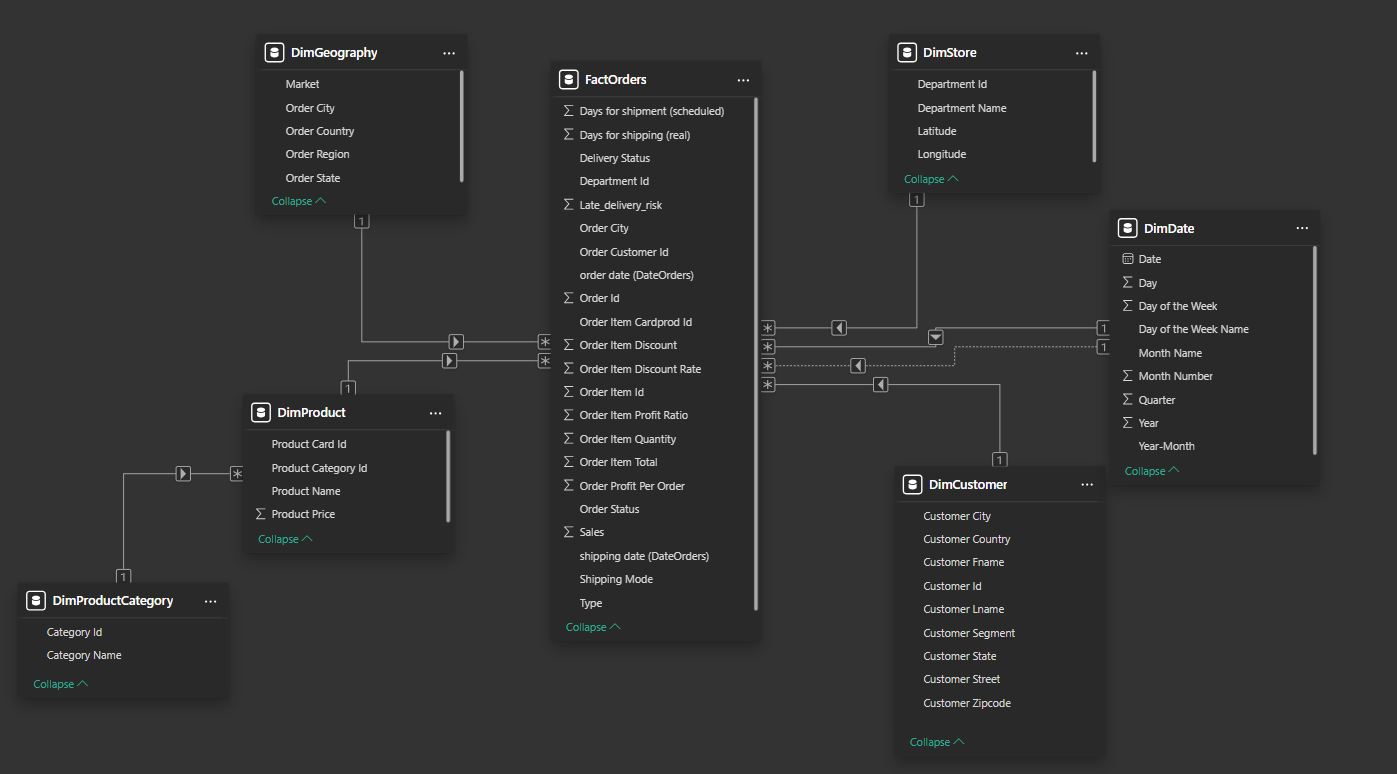

# Exploratory Data Analysis

## Overview
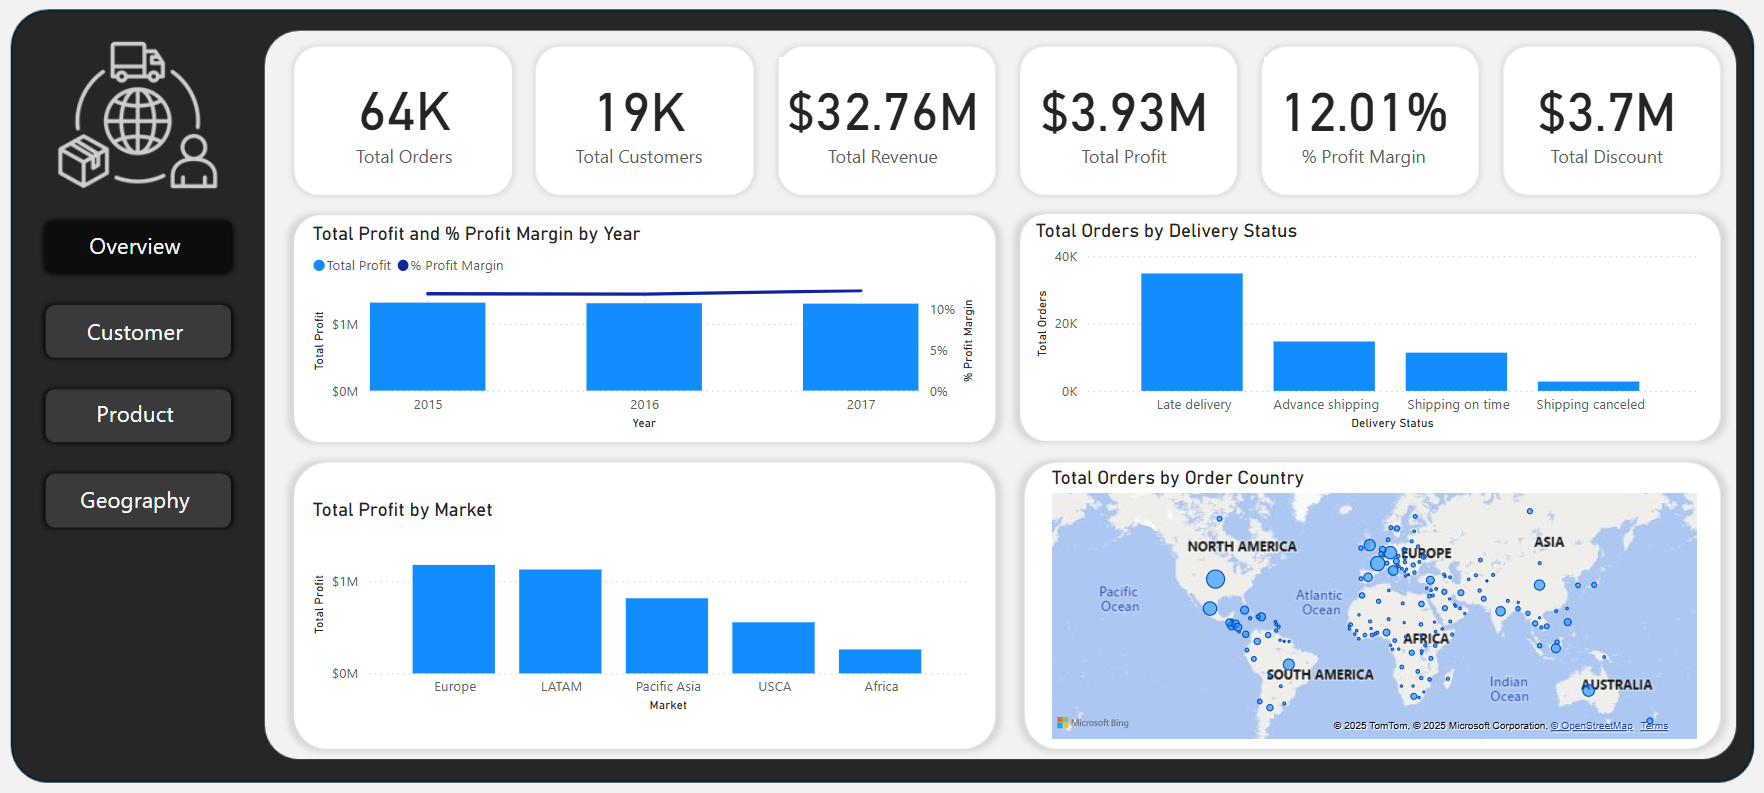

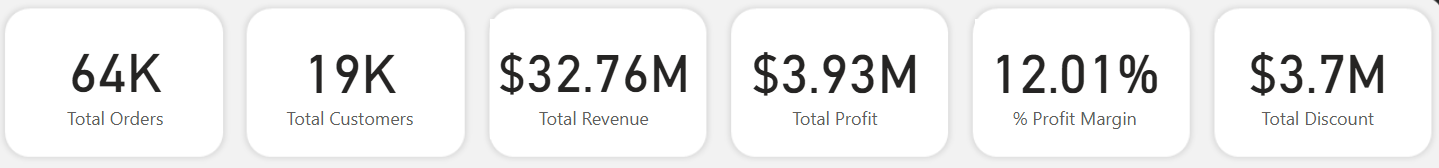
- There are 64K total orders and 19K unique customers.
- The total revenue is \\$32.76M, and the total profit is \\$3.93M, resulting in a 12.01% profit margin.
- The total discount amount is \\$3.7M, which is very close to the total profit.

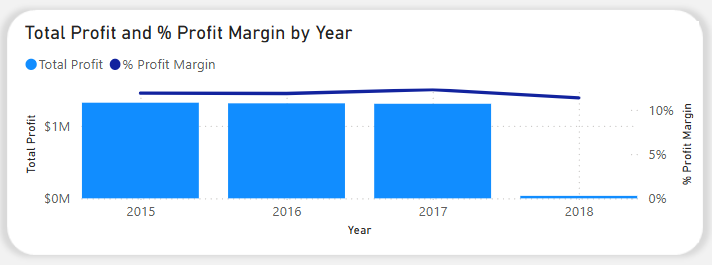
- Total profit remained consistent over the years; however, the profit margin slightly increased in 2017.
- 2018 does not have data for the entire year; therefore, we will exclude it from this analysis.

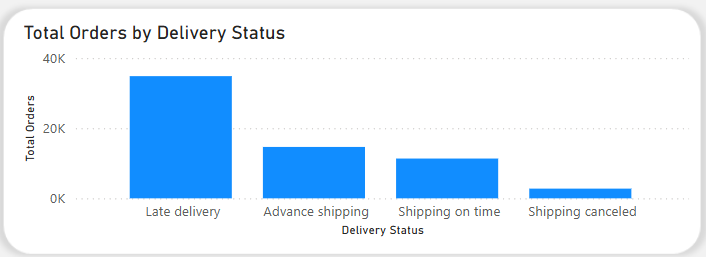

- Most of the orders are delivered late. We need to investigate further way this happens and I think we can use this dataset to create a better model that good estimate the delivery date for future orders.

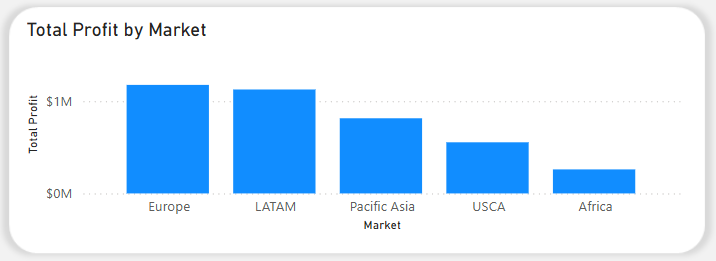

- Most of the profit comes from orders going to countries in Europe and LATAM.
- Africa has the lowest profit.

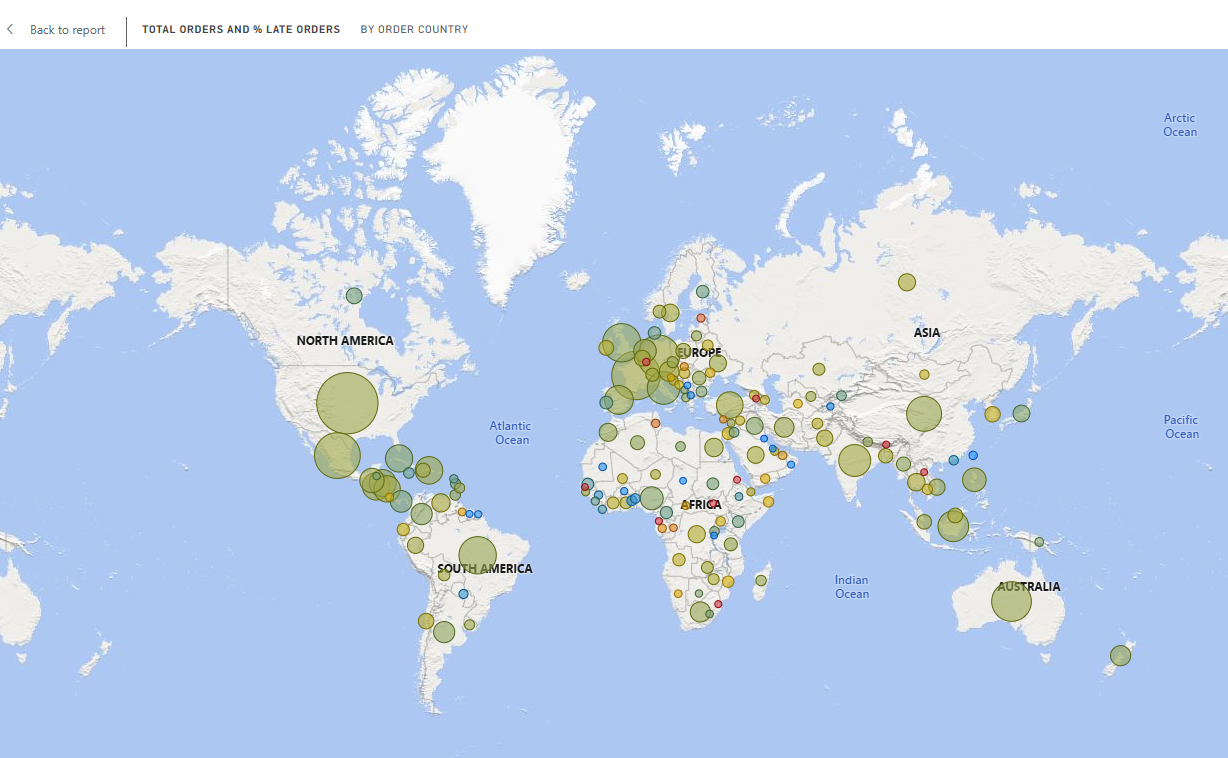

- We observe numerous orders directed to European countries such as France, Germany, and the United Kingdom. Additionally, a significant volume of orders is sent to Central and South America and the USA.
- Africa experiences a low volume of orders, which explains its minimal profit.
- Countries that have a high volume of orders also have a percentage of late deliveries close to the total average.

## Customer
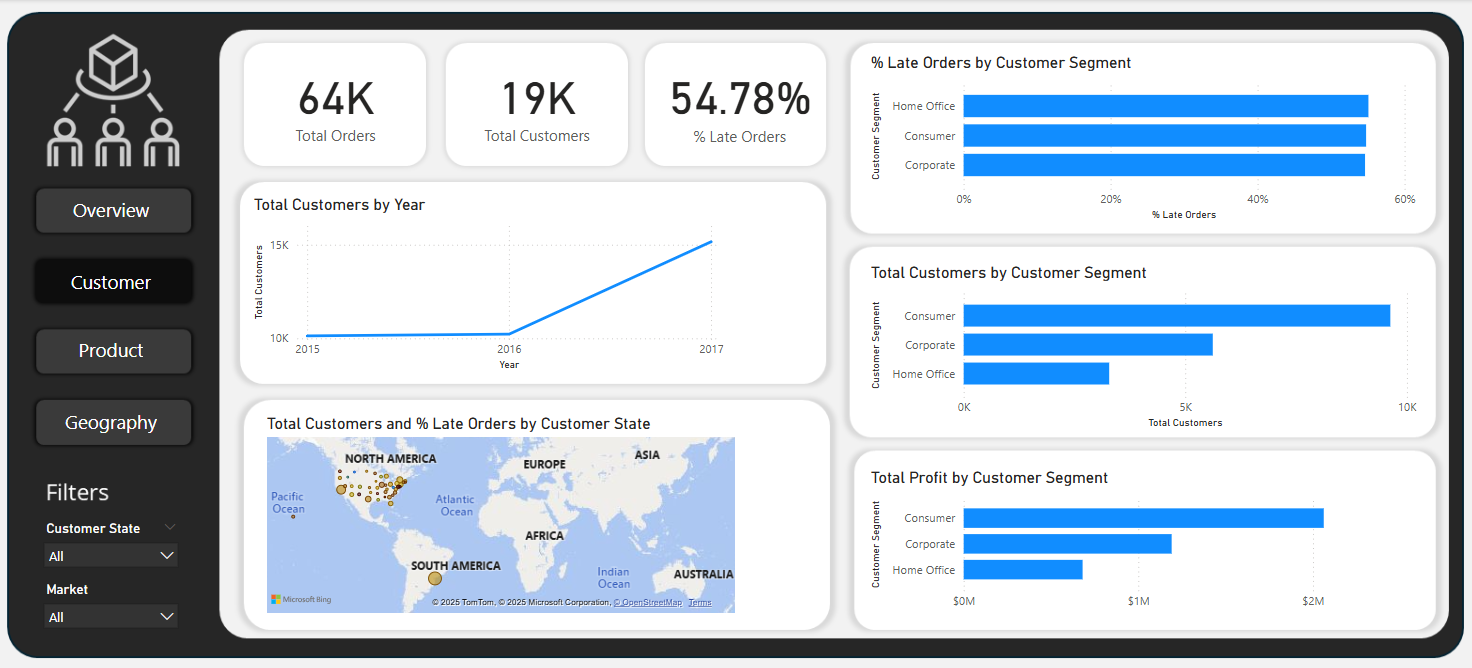

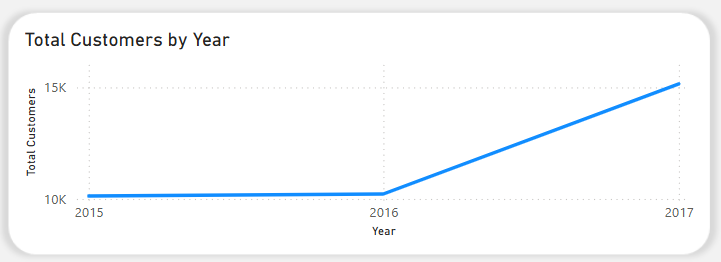
- Customers increased significantly in 2017, from 10K in 2016 to 15K in 2017 — a 50% increase.

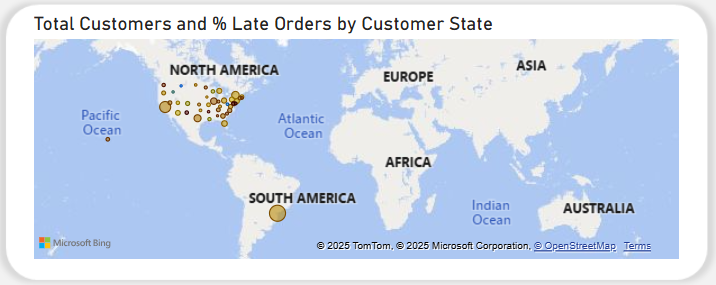
- Montana (MT) has the lowest percentage of late orders but only accounts for 10 customers and 31 orders.
- In contrast, the District of Columbia (DC), Delaware (DE), and New Mexico (NM) have the highest percentages of late orders, despite having relatively low volumes of customers and orders.
- On the other hand, Puerto Rico (PR) and California (CA) have significantly higher volumes of customers and orders, yet maintain lower percentages of late orders—even though the overall late order rate remains high at 54%.

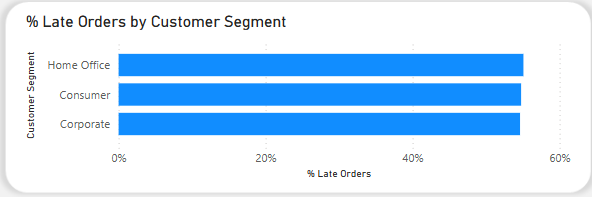
- We can't conclude that late orders are due to a specific customer segment, as there is no significant difference in the percentage of late orders among the segments.

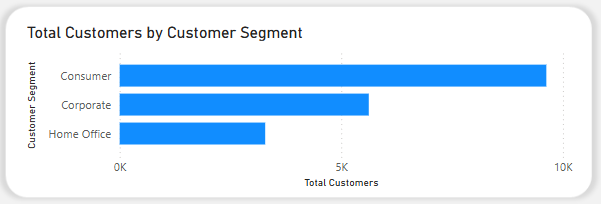
- Most of our customers are from the Consumer segment.

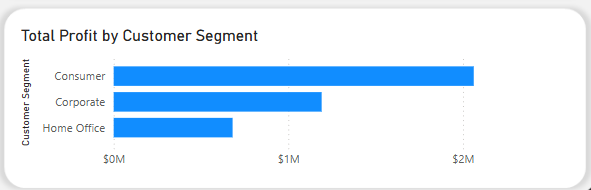
- The Consumer segment generates the largest profit. This is because most of our customers belong to the Consumer segment.

## Product

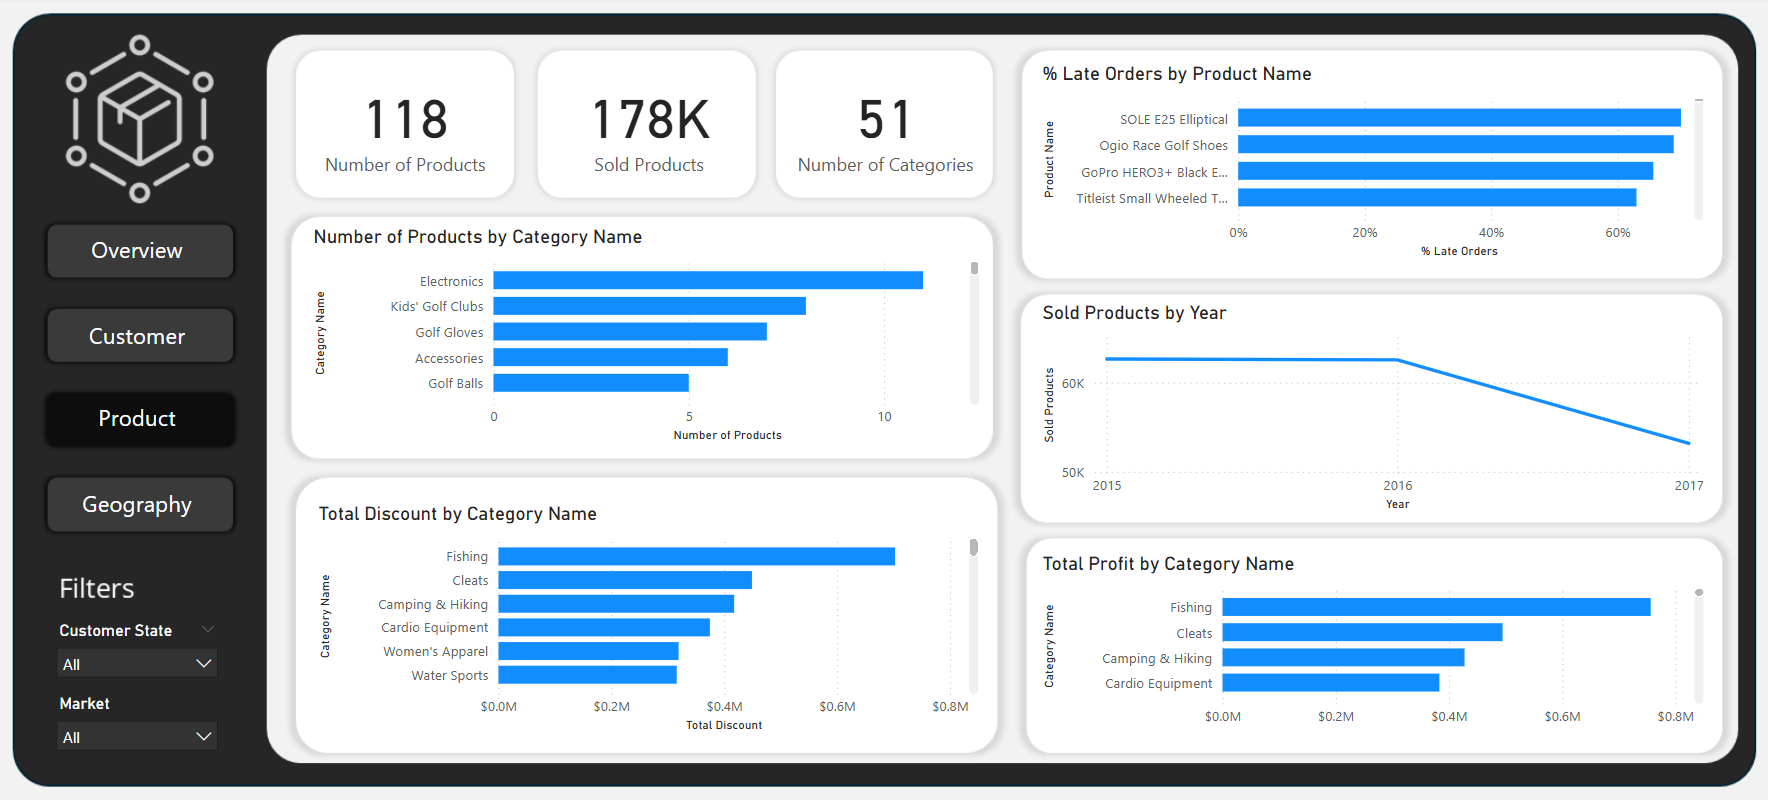

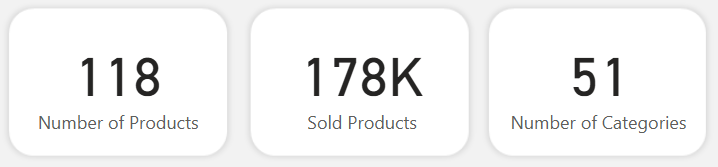
- There are 118 unique products and 51 categories, and the number of sold items is 178K.

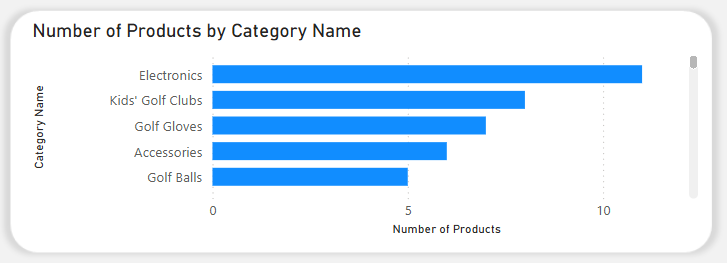
- Electronics category has the largest number of products.

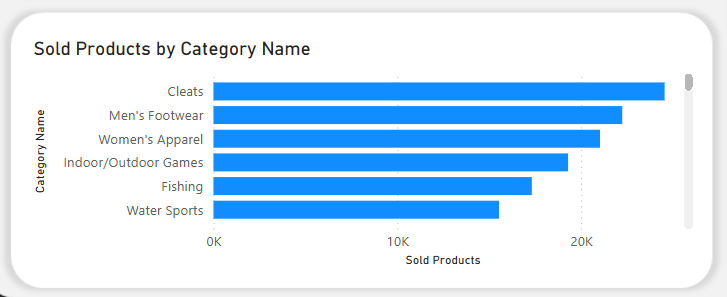
- Cleats category has the largest number of sold items despite it has only 2 products.

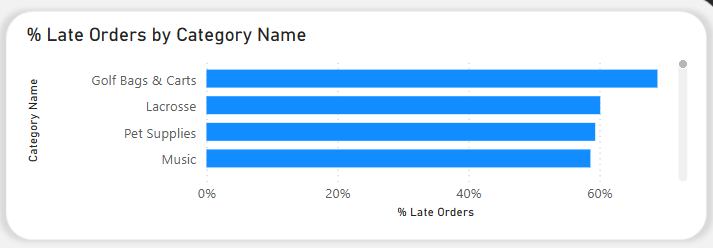
- Items from the Golf Bags & Carts category are the most likely to be delivered late.

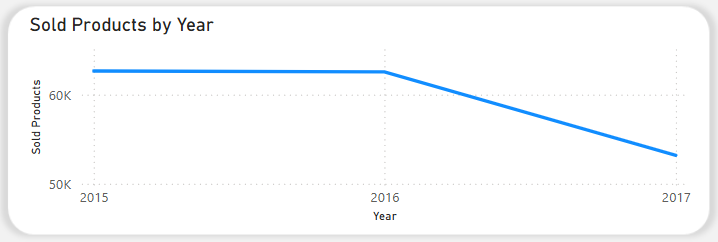
- Number of sold products decreased in 2017 compared to 2016 and 2015

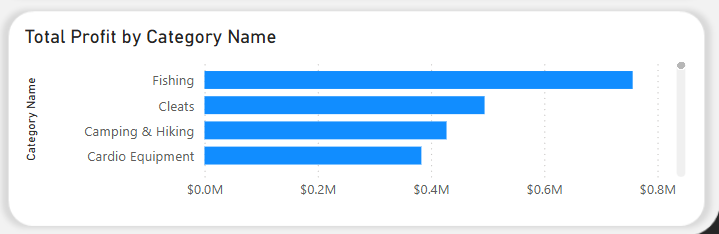
- The Fishing category generates the highest profit.

- The Cleats category has the highest number of products sold, but it generates less profit than the Fishing category.

## Geography